In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df1 = pd.read_csv('owid-covid-data.csv',sep=',',skiprows=0,header=0)
print(df1.shape)
print(df1.info())
df1.head()

(245080, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245080 entries, 0 to 245079
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    245080 non-null  object 
 1   continent                                   231302 non-null  object 
 2   location                                    245080 non-null  object 
 3   date                                        245080 non-null  object 
 4   total_cases                                 231012 non-null  float64
 5   new_cases                                   230674 non-null  float64
 6   new_cases_smoothed                          229475 non-null  float64
 7   total_deaths                                211567 non-null  float64
 8   new_deaths                                  211463 non-null  float64
 9   new_deaths_smoothed                         210277 non-nu

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
df2 = pd.read_csv('births-and-deaths-projected-to-2100.csv',sep=',',skiprows=0,header=0)
print(df2.shape)
print(df2.info())
df2.head()

(38505, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38505 entries, 0 to 38504
Data columns (total 7 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Entity                                             38505 non-null  object 
 1   Code                                               35787 non-null  object 
 2   Year                                               38505 non-null  int64  
 3   Deaths - Sex: all - Age: all - Variant: estimates  18360 non-null  float64
 4   Deaths - Sex: all - Age: all - Variant: medium     20145 non-null  float64
 5   Births - Sex: all - Age: all - Variant: estimates  18360 non-null  float64
 6   Births - Sex: all - Age: all - Variant: medium     20145 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.1+ MB
None


,Entity,Code,Year,Deaths - Sex: all - Age: all - Variant: estimates,Deaths - Sex: all - Age: all - Variant: medium,Births - Sex: all - Age: all - Variant: estimates,Births - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,283668.0,NaN,365303.0,NaN
1,Afghanistan,AFG,1951,282577.0,NaN,372040.0,NaN
2,Afghanistan,AFG,1952,280803.0,NaN,378290.0,NaN
3,Afghanistan,AFG,1953,279684.0,NaN,384933.0,NaN
4,Afghanistan,AFG,1954,280476.0,NaN,390412.0,NaN


In [5]:
df1=df1[df1['location']=='Japan']

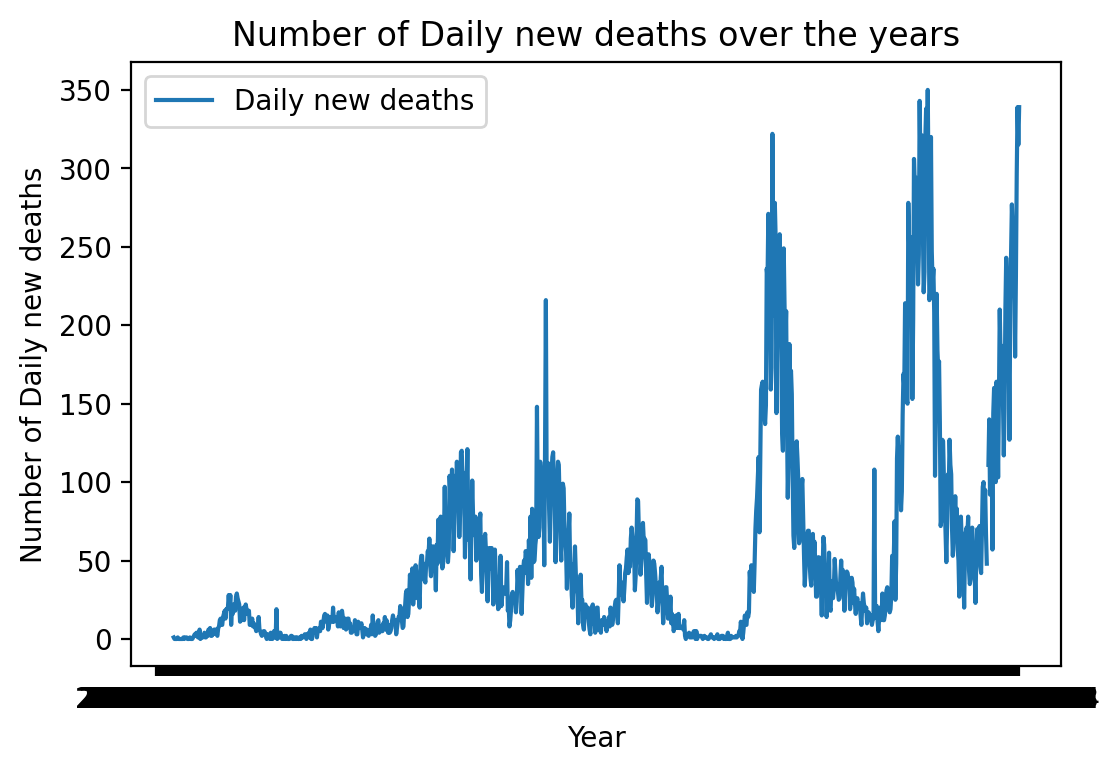

In [6]:
plt.figure(dpi=200)
plt.plot(df1['date'], df1['new_deaths'], label='Daily new deaths')
plt.legend()
plt.title('Number of Daily new deaths over the years')
plt.xlabel('Year')
plt.ylabel('Number of Daily new deaths')
plt.show()

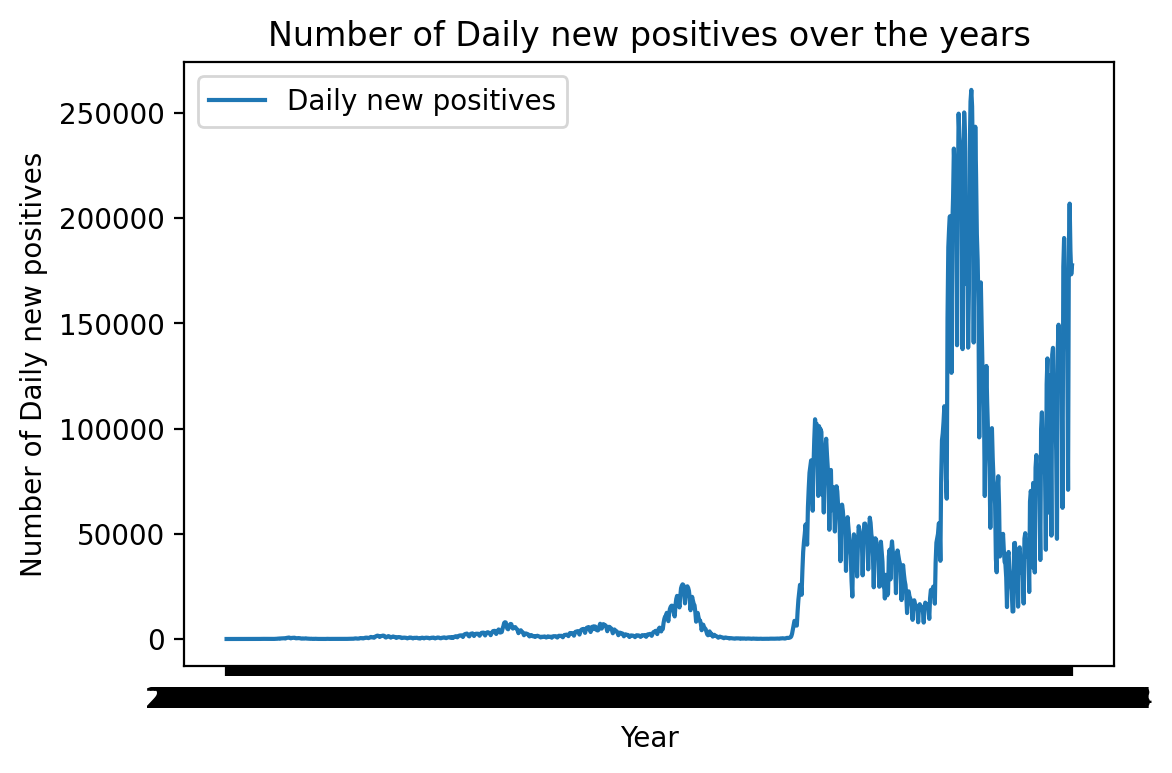

In [7]:
plt.figure(dpi=200)
plt.plot(df1['date'], df1['new_cases'], label='Daily new positives')
plt.legend()
plt.title('Number of Daily new positives over the years')
plt.xlabel('Year')
plt.ylabel('Number of Daily new positives')
plt.show()

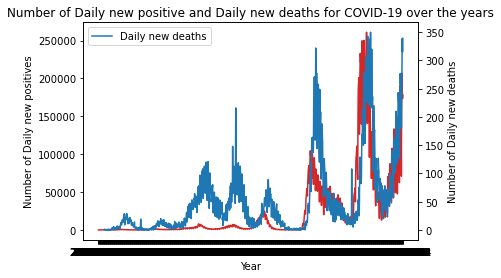

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(df1['date'], df1['new_cases'], label='Daily new positives',color='tab:red')
ax1.set_ylabel('Number of Daily new positives')
ax1.set_xlabel('Year')
ax2=ax1.twinx()
ax2.plot(df1['date'], df1['new_deaths'], label='Daily new deaths',color='tab:blue')
ax2.set_ylabel('Number of Daily new deaths')
plt.legend()
plt.title('Number of Daily new positive and Daily new deaths for COVID-19 over the years')
plt.show()

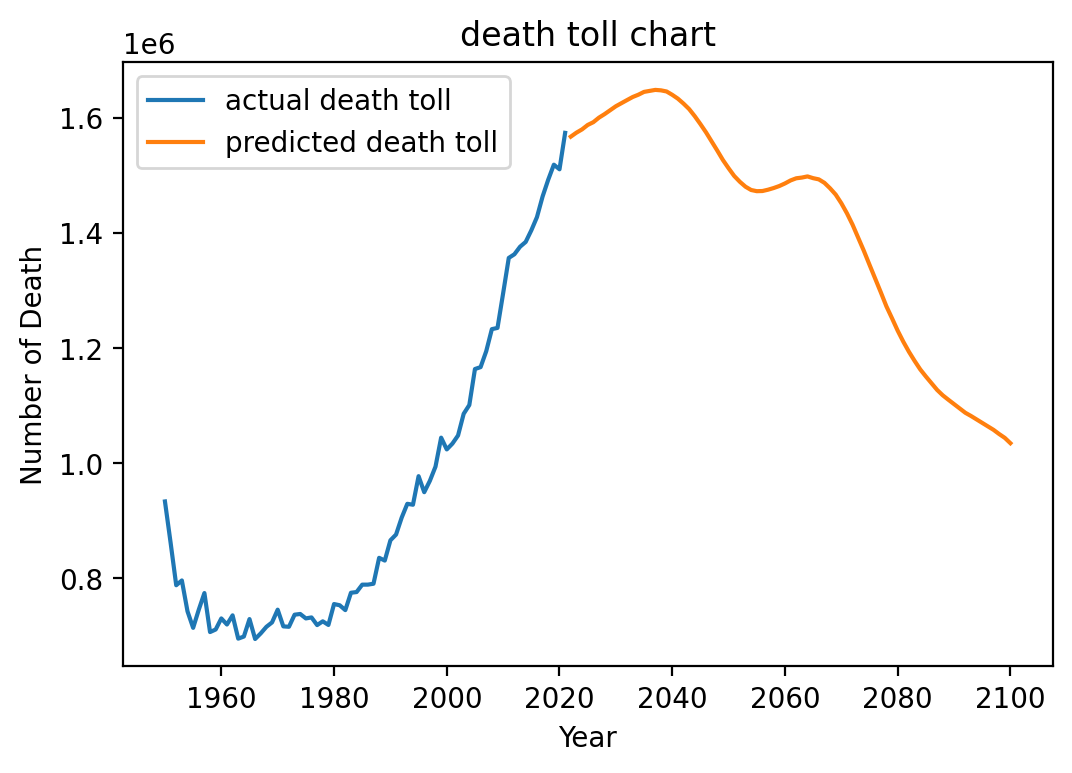

In [9]:
plt.figure(dpi=200)
plt.plot(df2[df2['Entity']=='Japan']['Year'],df2[df2['Entity']=='Japan']['Deaths - Sex: all - Age: all - Variant: estimates'],label='actual death toll')
plt.plot(df2[df2['Entity']=='Japan']['Year'],df2[df2['Entity']=='Japan']['Deaths - Sex: all - Age: all - Variant: medium'],label='predicted death toll')
plt.legend()
plt.title('death toll chart')
plt.xlabel('Year')
plt.ylabel('Number of Death')
plt.show()

In [10]:
import plotly.express as px

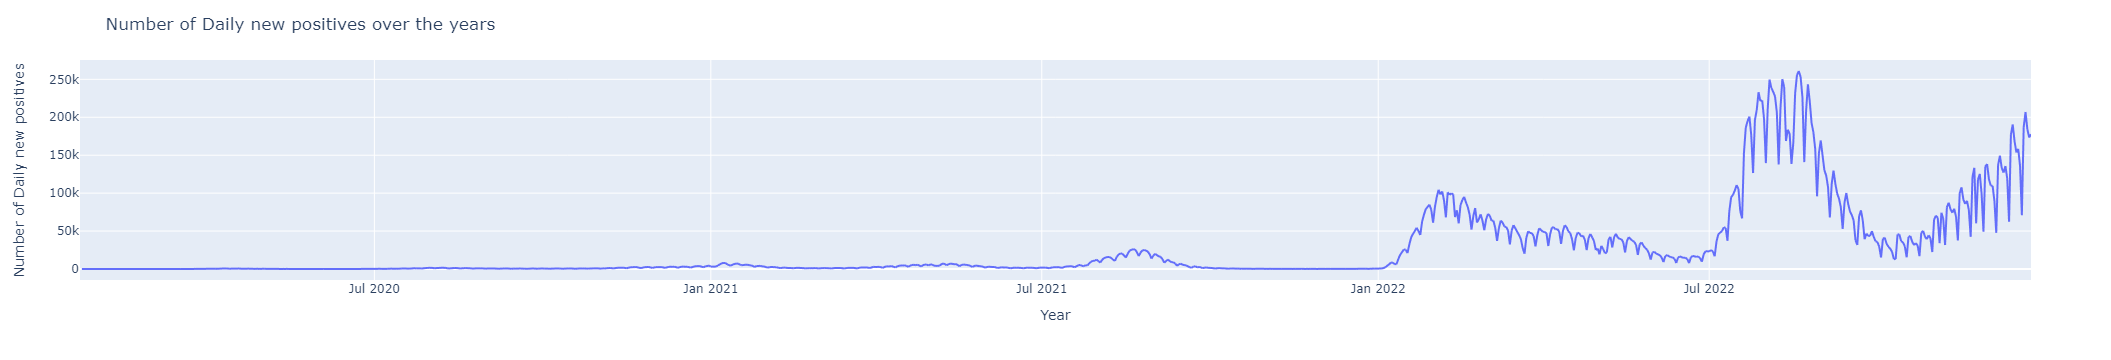

In [12]:
fig = px.line(df1, x=df1['date'], y=df1['new_cases'])
fig.update_layout(title='Number of Daily new positives over the years', xaxis_title='Year', yaxis_title='Number of Daily new positives')
fig.show()

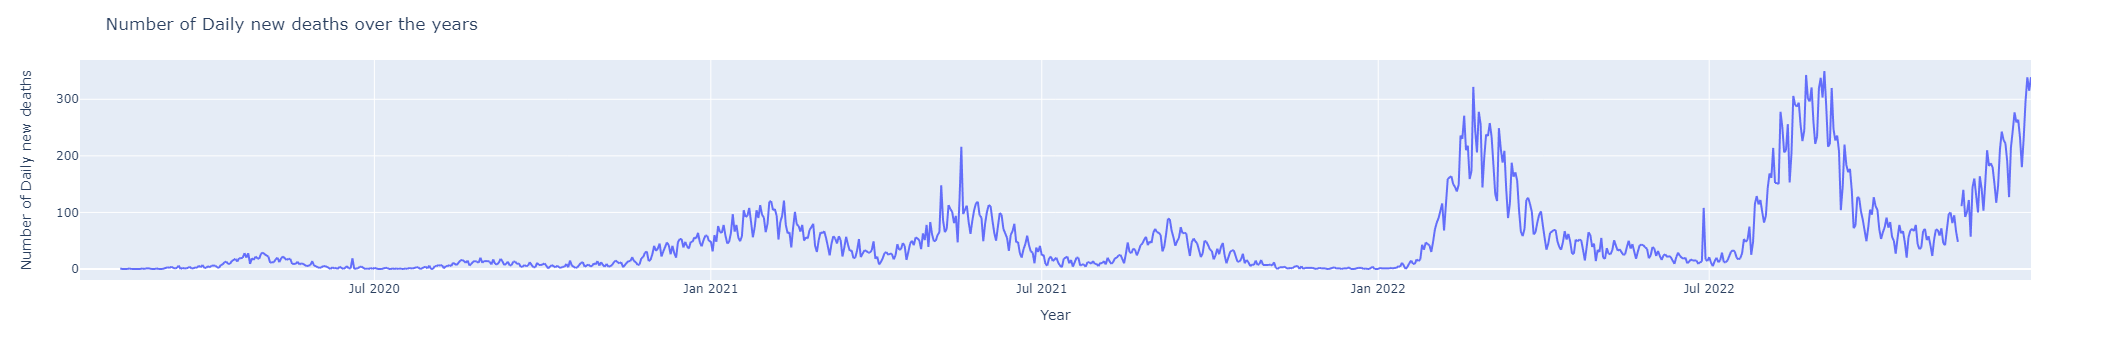

In [13]:
fig = px.line(df1, x=df1['date'], y=df1['new_deaths'])
fig.update_layout(title='Number of Daily new deaths over the years', xaxis_title='Year', yaxis_title='Number of Daily new deaths')
fig.show()

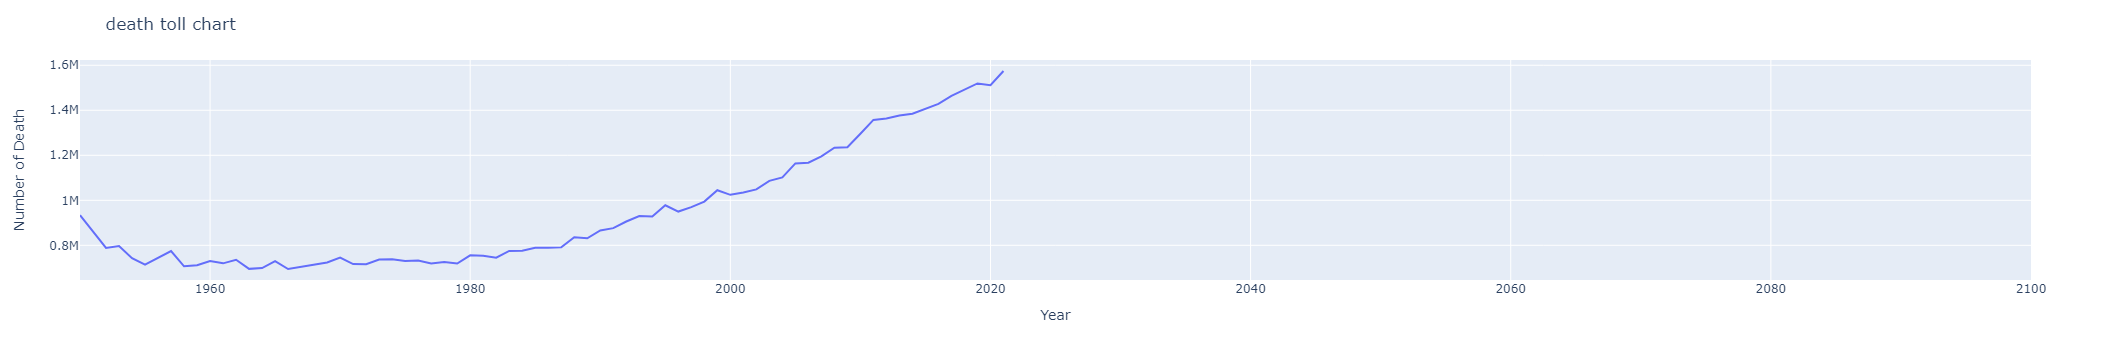

In [30]:
fig = px.line(df1, x=df2[df2['Entity']=='Japan']['Year'], y=df2[df2['Entity']=='Japan']['Deaths - Sex: all - Age: all - Variant: estimates'])
fig.update_layout(title='death toll chart', xaxis_title='Year', yaxis_title='Number of Death')
fig.show()

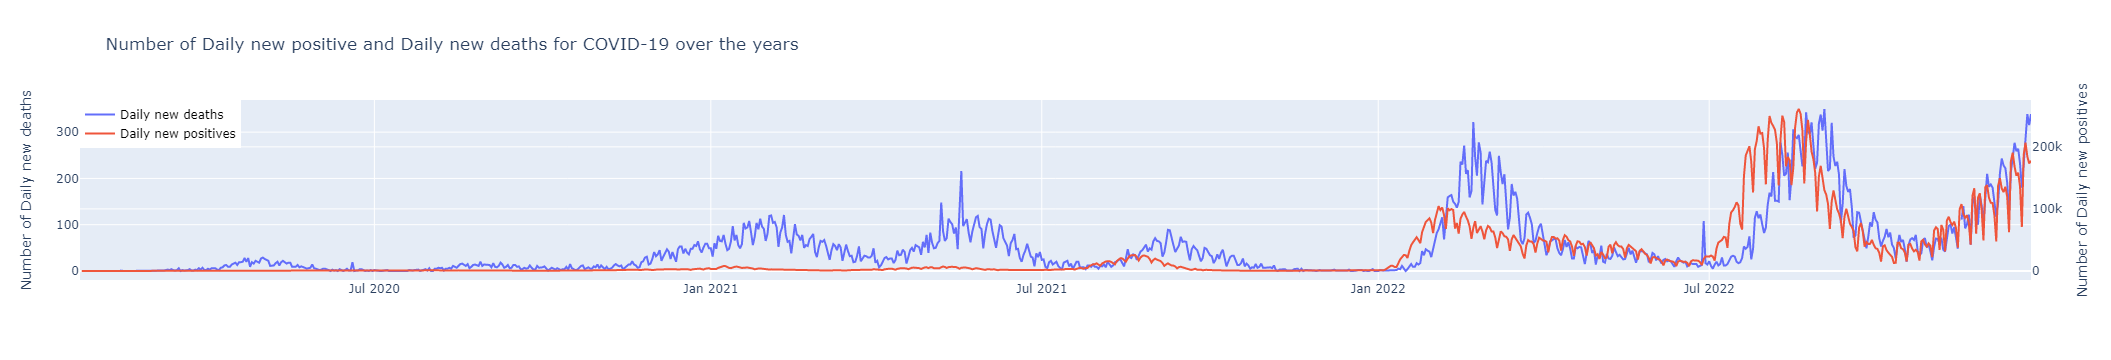

In [43]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


trace0 = go.Scatter(x=df1['date'], y=df1['new_deaths'],mode = 'lines',name='Daily new deaths',)
trace1 = go.Scatter(x=df1['date'], y=df1['new_cases'],mode = 'lines',name='Daily new positives', yaxis='y2')
data = [trace0,trace1]

layout = go.Layout(title='Number of Daily new positive and Daily new deaths for COVID-19 over the years', yaxis=dict(title='Number of Daily new deaths'), yaxis2=dict(title='Number of Daily new positives',overlaying='y',side='right'),legend=dict(x=0,y=1,font=dict(size=12,color="black")))
fig = go.Figure(data=data,layout=layout)
fig.show()